# Handwritten Digits classification based on CNN

## Creating a model based on the MNIST Dataset of Handwrittent Digits

In [0]:
%tensorflow_version 2.x

## Load the dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
print(f'The shape of x_train is {x_train.shape}')
print(f'X_train contains {x_train.shape[0]} pictures.')
print(f'Each pic in x_train is a {x_train.shape[1]} X {x_train.shape[2]} figure.')


The shape of x_train is (60000, 28, 28)
X_train contains 60000 pictures.
Each pic in x_train is a 28 X 28 figure.


In [2]:
print(f'The shape of y_train is {y_train.shape}')
print(f'There are {y_train.shape[0]} items in the y_train.')

The shape of y_train is (60000,)
There are 60000 items in the y_train.


## Print out the dataset

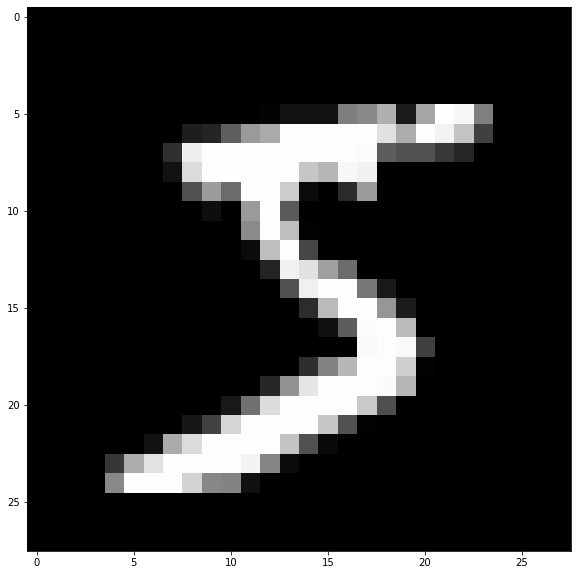

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[0], cmap='gray')

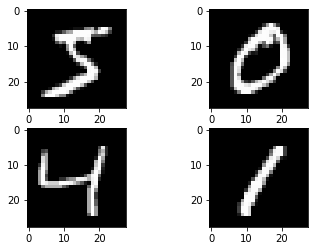

In [4]:
#Draw the previous 4 images in the x_train dataset
plt.subplot(2,2,1)
plt.imshow(x_train[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(x_train[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(x_train[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(x_train[3], cmap='gray')

## Prepare the dataset for training

1. Normazlize the dataset
2. Reshape the x_train/x_test dataset 
3. One-hot encode of the y_train/y_test

We always have to give a 4 dimensional array as input to the CNN.   
So input data has a shape of (batch_size, height, width, depth)

- Batch_size: number of images in the dataset (in MNIST, this value for x_train is 60000)
- height: the hight for each image (for MNIST, this value is 28)
- width: the width for each image (for MNIST, this value is 28)
- depth: the number of channels for an image(As all the images are in **grayscale**, the **number of channels is 1**. If it was a **color image**, then the **number of channels would be 3 (R, G, B)**).

## Nomalize the dataset

In [5]:
x_train = x_train.astype('float32') #cast to float32 datatype
x_test = x_test.astype('float32') #cast to float32 datatype
x_train = x_train/255
x_test = x_test/255

## Reshape the dataset

In [6]:
# get the numebr of images in x_train
train_imgs = x_train.shape[0]
# get the number of images in x_test
test_imgs = x_test.shape[0]

#get the width of images
widht_img = x_train.shape[1]
#get the height of images
height_img = x_train.shape[2]


print(f'{train_imgs}/{test_imgs} images in x_train/x_test')
print(f'The width of a image is {widht_img}')
print(f'The height of a image is {height_img}')

#reshape
x_train = x_train.reshape(train_imgs, widht_img, height_img, 1)
x_test = x_test.reshape(test_imgs, widht_img, height_img, 1)

60000/10000 images in x_train/x_test
The width of a image is 28
The height of a image is 28


## One-hot encode y_train and y_test

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

We use the following architecture to construct the CNN.  

![](https://github.com/Hvass-Labs/TensorFlow-Tutorials/raw/1e901d01cb0739de29b9aea33a6b30a1b26e2414/images/02_network_flowchart.png)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 input_shape=(28 ,28 ,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5), 
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.25))  
# Flatten multi-dimensional data to a one-dimensional data
model.add(Flatten())
# Add a fully-connection layer
model.add(Dense(128, activation='relu'))
# Add the output layer
model.add(Dense(10, activation='softmax'))  
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
h = model.fit(x_train, y_train, batch_size=300, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 381us/sample - loss: 0.4005 - accuracy: 0.8842
Epoch 2/20
60000/60000 [==============================] - 24s 405us/sample - loss: 0.1046 - accuracy: 0.9677
Epoch 3/20
60000/60000 [==============================] - 28s 466us/sample - loss: 0.0748 - accuracy: 0.9772
Epoch 4/20
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0604 - accuracy: 0.9814
Epoch 5/20
60000/60000 [==============================] - 25s 415us/sample - loss: 0.0507 - accuracy: 0.9844
Epoch 6/20
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0439 - accuracy: 0.9862
Epoch 7/20
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0395 - accuracy: 0.9877
Epoch 8/20
60000/60000 [==============================] - 27s 454us/sample - loss: 0.0349 - accuracy: 0.9886
Epoch 9/20
60000/60000 [==============================] - 25s 420us/sample - loss: 0.0319 - accuracy: 0.9

In [57]:
r = model.evaluate(x_test, y_test)
print(f'Loss: {r[0]}')
print(f'Accuracy: {r[1]}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss: 0.019535403533562205
Accuracy: 0.9943000078201294
